<a href="https://colab.research.google.com/github/petrenkoVitaliy/hands_recognition/blob/master/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pickle


drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [45]:
VERSION = "synth_gray_120-0"
# 
# 01
# 02
# spoke_gray80
# spoke_gray120
# spoke_gray120_20-40
# spoke_gray120_20-20
# spoke_gray_white120_20-20

# synth_gray_120-0

X = pickle.load(open("/content/drive/My Drive/pickle/X_" + VERSION + ".pickle", "rb"))
y = pickle.load(open("/content/drive/My Drive/pickle/y_" + VERSION + ".pickle", "rb"))
print(len(X))
print(len(y))
print(VERSION)

3890
3890
synth_gray_120-0


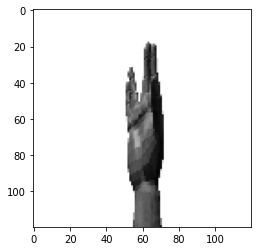

In [46]:
import matplotlib.pyplot as plt
IMG_SIZE = 120
CROPPING = [0, 0]
INDEX = 100

X_init = X.reshape(
    -1,
    1,
    IMG_SIZE-2*CROPPING[0],
    IMG_SIZE-2*CROPPING[1],
)[INDEX]

plt.imshow(X_init[0], cmap="gray")
plt.show()

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
y = np.array(y)
for index, value in enumerate(X):
    X[index] = value / 255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=np.shape(X)[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X, y, batch_size=32, epochs=1, validation_split=0.1)

110/110 [==============================] - 1s 13ms/step - loss: 0.3267 - accuracy: 0.8932 - val_loss: 0.0147 - val_accuracy: 0.9974


In [48]:
model.evaluate(X, y, verbose=1)

122/122 [==============================] - 1s 5ms/step - loss: 0.0146 - accuracy: 0.9992


[0.01460491307079792, 0.9992287755012512]

In [58]:
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image

f = files.upload()

Saving Hand_0000009.jpg to Hand_0000009.jpg


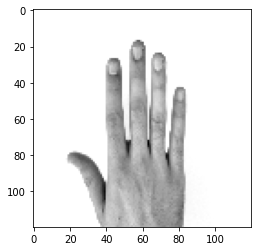

In [69]:
img_path = "Hand_0000009.jpg"
IMG_SIZE = 120

import cv2
img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
resized_image_array  = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
crop_img_array = resized_image_array[0:IMG_SIZE,
                                     0:IMG_SIZE]
crop_img_array = np.rot90(np.rot90(crop_img_array))
plt.imshow(crop_img_array, cmap="gray")
plt.show()


In [70]:
import numpy
reshaped_image = numpy.array(crop_img_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict(reshaped_image)

print(int(prediction))
print(prediction)

1
[[1.]]
